# Data wrangling

This notebook is adapated from Joris Van den Bossche tutorial:

* https://github.com/paris-saclay-cds/python-workshop/blob/master/Day_1_Scientific_Python/02-pandas_introduction.ipynb

In [2]:
# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

## 1. Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

**What is `pandas`?**

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


**When do you need pandas?**

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...): 

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

## 2. The pandas data structures: `DataFrame` and `Series`

### 2.1 The 2D table: pandas `DataFrame`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


<img align="left" width=50% src="./schema-dataframe.svg">

We can create a pandas Dataframe and specify the index and columns to use.

In [25]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],  # la clé du dict correspond à la colonne
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


We can check that we are manipulating a Pandas DataFrame

In [26]:
type(df_countries)

pandas.core.frame.DataFrame

As previously mentioned, the dataframe stores information regarding the column and index information.

In [14]:
df_countries.

SyntaxError: invalid syntax (<ipython-input-14-f1566803dcb8>, line 1)

In [27]:
df_countries.columns

Index(['country', 'population', 'area', 'capital'], dtype='object')

In [28]:
df_countries.index

RangeIndex(start=0, stop=5, step=1)

You can get an overview of the information of a dataframe using the `info()` method:

In [30]:
df_countries.info()
# Sans Pandas, des Objet => des String
# Pandas permet de transformer les String en Numérique afin qu'ils soient utilisables par les algo de L

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
country       5 non-null object
population    5 non-null float64
area          5 non-null int64
capital       5 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


An information which is quite useful is related to the data type.

It is important to know that machine learning algorithms are based on mathematics and algebra. Thus, these algorithms expect numerical data.

Pandas allows to read, manipulate, explore, and transform heterogeneous data to numerical data.

In [32]:
df_countries.dtypes
#type(df_countries)

country        object
population    float64
area            int64
capital        object
dtype: object

#### Exercise

We will define a set of 1D NumPy arrays containing the data that we will work with.

In [21]:
country_name = ['Austria', 'Iran, Islamic Rep.', 'France']
country_code = ['AUT', 'IRN', 'FRA']
gdp_2015 = [1349034029453.37, 385874474398.59, 2438207896251.84]
gdp_2017 = [1532397555.55556, 439513511620.591,2582501307216.42]

In [65]:

# Dataframe using ndarray like
# columns = ['country_name', 'country_code', 'gdp_2015', 'gdp_2016']
# data = [ ['Austria', 'AUT', 1349034029453, 1532397555],
#          ['Iran', 'IRN', 385874474398.59, 439513511620.591] ]
# df_c = pd.DataFrame(columns = columns, data = data)
# df_c

#Dataframe using dict like
dict = {
    'country_name' : ['Austria', 'Iran, Islamic Rep.', 'France'],
    'country_code' : ['AUT', 'IRN', 'FRA'],
    'gdp_2015' : [1349034029453.37, 385874474398.59, 2438207896251.84],
    'gdp_2017' : [1532397555.55556, 439513511620.591,2582501307216.42]
}
df_dict = pd.DataFrame(data = dict)
df_dict
    


,country_name,country_code,gdp_2015,gdp_2017
0,Austria,AUT,1.349034e+12,1.532398e+09
1,"Iran, Islamic Rep.",IRN,3.858745e+11,4.395135e+11
2,France,FRA,2.438208e+12,2.582501e+12


In [67]:
# Give the version of pd
pd.__version__

# setdefault(key[, default]) : If key is in the dictionary, return its value. 
# If not, insert key with a value of default and return default. default defaults to None.
dict.setdefault("country name", "jonko")

#dict.keys([for country in "country name"])
#d = dict([(x,0) for x in a])
#data

{'country_name': ['Austria', 'Iran, Islamic Rep.', 'France'],
 'country_code': ['AUT', 'IRN', 'FRA'],
 'gdp_2015': [1349034029453.37, 385874474398.59, 2438207896251.84],
 'gdp_2017': [1532397555.55556, 439513511620.591, 2582501307216.42],
 'country name': 'jonko'}

* Create a Python dictionary where the keys will be the name of the columns and the values will be the corresponding Python list.

In [24]:
pd?

In [68]:
# %load solutions/02_solutions.py
df = pd.DataFrame({'Country Name': country_name,
                   'Country Code': country_code,
                   2015: gdp_2015,
                   2017: gdp_2017})
df


,Country Name,Country Code,2015,2017
0,Austria,AUT,1.349034e+12,1.532398e+09
1,"Iran, Islamic Rep.",IRN,3.858745e+11,4.395135e+11
2,France,FRA,2.438208e+12,2.582501e+12


* Use the same procedure (Python dictionary) but specify that the country code should be used as the index. Therefore, check the parameter `index_col` or the method `DataFrame.set_index()`

In [86]:
# %load solutions/03_solutions.py
df = pd.DataFrame({'Country Name': country_name,
                   'Country Code': country_code,
                   2015: gdp_2015,
                   2017: gdp_2017})
df = df.set_index('Country Code')
df
# df = df.reset_index() permet ed resetter l'index

,Country Name,2015,2017
Country Code,,,
AUT,Austria,1.349034e+12,1.532398e+09
IRN,"Iran, Islamic Rep.",3.858745e+11,4.395135e+11
FRA,France,2.438208e+12,2.582501e+12


In [80]:
# %load solutions/04_solutions.py
df = pd.DataFrame({'Country Name': country_name,
                   2015: gdp_2015,
                   2017: gdp_2017},
                  index=country_code)
df


,Country Name,2015,2017
AUT,Austria,1.349034e+12,1.532398e+09
IRN,"Iran, Islamic Rep.",3.858745e+11,4.395135e+11
FRA,France,2.438208e+12,2.582501e+12


In [97]:
print(country_code)
print(2015)
print(2017)
#
pd.DataFrame(
    data=np.transpose([country_code, 2015, 2017]),
    columns=["entete"], index=country_code
)


['AUT', 'IRN', 'FRA']
2015
2017


,entete
AUT,"[AUT, IRN, FRA]"
IRN,2015
FRA,2017


### 2.2 One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [101]:
print(df_countries)
print(type(df_countries))

          country  population    area    capital
0         Belgium        11.3   30510   Brussels
1          France        64.3  671308      Paris
2         Germany        81.3  357050     Berlin
3     Netherlands        16.9   41526  Amsterdam
4  United Kingdom        64.9  244820     London
<class 'pandas.core.frame.DataFrame'>


In [102]:
df_countries.loc[:, 'population']

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

In [104]:
population = df_countries.loc[:, 'population']
print(type(population))
print(population)

<class 'pandas.core.series.Series'>
0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64


We can check that we manipulate a Pandas Series

In [105]:
type(population)

pandas.core.series.Series

### 2.3 Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

In [ ]:
# pd.read_xxxx
pd.read

In [ ]:
df.to_xxxx

Very powerful csv reader:

In [106]:
pd.read_csv?

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [108]:
import os

In [109]:
df = pd.read_csv(os.path.join("data", "titanic.csv"))

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
pathname = os.path.join("data","20000101_20161231-NO2.csv")
df = pd.read_csv(pathname, sep = ";", skiprows = [1], na_values="n/d",
                parse_dates = True , infer_datetime_format=True, index_col = "timestamp")
df.head()
#df.info()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


<div class="alert alert-success">

<b>EXERCISE</b>: Read the `data/20000101_20161231-NO2.csv` file into a DataFrame `no2`
<br><br>
Some aspects about the file:
 <ul>
  <li>Which separator is used in the file?</li>
  <li>The second row includes unit information and should be skipped (check `skiprows` keyword)</li>
  <li>For missing values, it uses the `'n/d'` notation (check `na_values` keyword)</li>
  <li>We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword)</li>
</ul>
</div>

In [122]:
no2 = pd.read_csv(os.path.join("data", "20000101_20161231-NO2.csv"), sep=";", 
                  skiprows=[1],
                  na_values = "n/d",
                  parse_dates = True,
                  # parse_dates = [timestamp],
                  index_col = 0
                )
no2.info()
no2.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
BASCH    139949 non-null float64
BONAP    136493 non-null float64
PA18     142259 non-null float64
VERS     143813 non-null float64
dtypes: float64(4)
memory usage: 5.7 MB


DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=149039, freq=None)

In [131]:
# %load solutions/22_solutions.py
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'],
                  index_col=0, parse_dates=True)
no2.head()


,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [133]:
# %load solutions/22_solutions.py
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';', 
                  skiprows=[1], 
                  na_values=['n/d'],
                  parse_dates=['timestamp'])
#no2['timestamp'] = pd.to_datetime(no2['timestamp'])
no2.head()


,timestamp,BASCH,BONAP,PA18,VERS
0,2000-01-01 01:00:00,108.0,NaN,65.0,47.0
1,2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2,2000-01-01 03:00:00,97.0,58.0,73.0,34.0
3,2000-01-01 04:00:00,77.0,52.0,57.0,29.0
4,2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [134]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149039 entries, 0 to 149038
Data columns (total 5 columns):
timestamp    149039 non-null datetime64[ns]
BASCH        139949 non-null float64
BONAP        136493 non-null float64
PA18         142259 non-null float64
VERS         143813 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.7 MB


## 3. Selecting and filtering data

One of pandas' basic features is the labeling of rows and columns, but this makes indexing a bit complex. We now have to distuinguish between:

* selection by **label**
* selection by **position**


### 3.1 Indexing by label using `.loc`

We will first select data from the dataframe selecting by **label**.

In [172]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data).set_index('country')
df_countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


The syntax to select by label is `.loc['row_name', 'col_name']`. Therefore, we can get a row of the dataframe by indicating the name of the index to select.

In [136]:
df_countries = pd.DataFrame(data).set_index("country")
df_countries.loc['France', :]

population      64.3
area          671308
capital        Paris
Name: France, dtype: object

Similarly, we can get a column of the dataframe by indicating the name of the column.

In [147]:
df_countries.loc[:, 'area']


country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

Specifying both index and column name, we will get the intersection of the row and the column.

In [148]:
df_countries.loc['France', 'area']

671308

We can get several columns by passing a list of the columns to be selected.

In [181]:
print(df_countries.loc['France', ['area', 'population']])
print(df_countries.loc['France', 'area': 'population'])
# They don t return the same set

area          671308
population      64.3
Name: France, dtype: object
Series([], Name: France, dtype: object)


This is the exact same behavior with the index for the rows.

In [180]:
print(df_countries.loc[[ 'Belgium', 'France'], ['area', 'population']])
print(df_countries.loc[ 'Belgium': 'France', ['area', 'population']])
# They return the same set

           area  population
country                    
Belgium   30510        11.3
France   671308        64.3
           area  population
country                    
Belgium   30510        11.3
France   671308        64.3


You can go further and slice a portion of the dataframe.

In [182]:
df_countries.loc['France':'Netherlands', :]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam


Note that in this case, the first and last item of the slice are selected.

### 3.2  Indexing by position using `.iloc`

Sometimes, it is handy to select a portion of the data given the row and column indices number. We can this indexing by **position**.

In [183]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data).set_index('country')
df_countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


The syntax is similar to `.loc`. It will be `.iloc[row_id, col_id]`. We can get the first row.

In [184]:
df_countries.iloc[0, :]

population        11.3
area             30510
capital       Brussels
Name: Belgium, dtype: object

Or the last column.

In [185]:
df_countries.iloc[:, -1]
# OR --> df_countries.iloc[:, 2]  

country
Belgium            Brussels
France                Paris
Germany              Berlin
Netherlands       Amsterdam
United Kingdom       London
Name: capital, dtype: object

And make the intersections.

In [ ]:
df_countries.iloc[0, -1]

Passing a list of indices is also working.

In [187]:
df_countries.iloc[[0, 1], [-2, -1]]

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris


And we can use slicing as well.

In [190]:
df_countries.iloc[1:3, 0:2]

,population,area
country,,
France,64.3,671308
Germany,81.3,357050


However, be aware that the ending index of the slice is discarded.

### 3.3 Use the pandas shortcut

In [191]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data).set_index('country')
df_countries

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


Pandas provides a shortcut to select some part of the data.

In [192]:
df_countries['population']

country
Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
Name: population, dtype: float64

In [193]:
df_countries[['area', 'capital']]

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris
Germany,357050,Berlin
Netherlands,41526,Amsterdam
United Kingdom,244820,London


In [194]:
df_countries[2:5]

,population,area,capital
country,,,
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [195]:
df_countries['Germany':'United Kingdom']

,population,area,capital
country,,,
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


You don't need to use `loc` and `iloc`. The selection rules are:

* Passing a single label or list of labels will select a column or several columns;
* Passing a slice (label or indices) will select the corresponding rows.

You can always use the systematic indexing to avoid confusion. Use the shortcut at your own risk.

### 3.4 Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [211]:
print(df_countries['population'] > 60)
print('--')
print(df_countries.loc[:, 'population'] > 60)

country
Belgium           False
France             True
Germany            True
Netherlands       False
United Kingdom     True
Name: population, dtype: bool
--
country
Belgium           False
France             True
Germany            True
Netherlands       False
United Kingdom     True
Name: population, dtype: bool


In [212]:
mask_pop_above_60 = df_countries['population'] > 60  # mask boolean

We can then use this mask to index a serie or a dataframe.

In [241]:
population = df_countries['population']
print(population)
print("--")
print(type(population))

country
Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
Name: population, dtype: float64
--
<class 'pandas.core.series.Series'>


In [460]:
population.loc[mask_pop_above_60]
# NB: Utiliser tjrs les iloc et les loc

country
France            64.3
Germany           81.3
United Kingdom    64.9
Name: population, dtype: float64

In [461]:
population[mask_pop_above_60]

country
France            64.3
Germany           81.3
United Kingdom    64.9
Name: population, dtype: float64

In [242]:
df_countries.loc[mask_pop_above_60]

,population,area,capital
country,,,
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
United Kingdom,64.9,244820,London


In [462]:
df_countries.loc[mask_pop_above_60]["capital"]

country
France             Paris
Germany           Berlin
United Kingdom    London
Name: capital, dtype: object

In [243]:
df_countries[~mask_pop_above_60]

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
Netherlands,16.9,41526,Amsterdam


### 3.5 Exercise

In [349]:
df = pd.read_csv(os.path.join("data","titanic.csv"))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [288]:
# print(df["Sex"] == "male" )
# print(df["Age"] > 60 )
#
# NB: SHOULD use parnthesis between logical condition OTHERWISE a runtime error 
mask = (df["Sex"] == "male") & (df["Age"] > 60)
df.loc[mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


Select the sub-dataframe for which the men are older than 60 years old. Using the attribute shape, find how many individual correspond to this criteria.

In [304]:
# %load solutions/05_solutions.py
print(df[(df['Sex'] == 'male') & (df['Age'] > 60)])
print(df[(df['Sex'] == 'male') & (df['Age'] > 60)].shape[0])



                                      PassengerId  Survived  Pclass   Sex  \
Name                                                                        
Wheadon, Mr. Edward H                          34         0       2  male   
Ostby, Mr. Engelhart Cornelius                 55         0       1  male   
Goldschmidt, Mr. George B                      97         0       1  male   
Connors, Mr. Patrick                          117         0       3  male   
...                                           ...       ...     ...   ...   
Barkworth, Mr. Algernon Henry Wilson          631         1       1  male   
Mitchell, Mr. Henry Michael                   673         0       2  male   
Crosby, Capt. Edward Gifford                  746         0       1  male   
Svensson, Mr. Johan                           852         0       3  male   

                                       Age  SibSp  Parch      Ticket     Fare  \
Name                                                                   

In [269]:
# %load solutions/05_solutions.py
mask_sex = df.loc[:,'Sex'] == 'male'
print(mask_sex)


0       True
1      False
2      False
3      False
       ...  
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool


In [270]:
mask_above_60 = df.loc[:, 'Age'] > 60

In [254]:
mask = mask_sex & mask_above_60
mask

0      False
1      False
2      False
3      False
       ...  
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [273]:
df = df.loc[(df.loc[:, 'Sex'] == 'male') & (df.loc[:, 'Age'] > 60)]
print(df)

     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
..           ...       ...     ...                                   ...   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   male  66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   male  65.0      0      1      113509  61.9792   B30        C  
96   male  71.0      0      0    PC

In [230]:
df.shape

(19, 12)

In [231]:
len(df)

19

In [232]:
not ~
and &
or |

SyntaxError: invalid syntax (<ipython-input-232-dd8ce6ab9a1e>, line 1)

## 4. Statistical analysis

Pandas provides an easy and fast way to explore data. Let's explore the `titanic` data set.

In [290]:
df = df.set_index('Name')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Wheadon, Mr. Edward H",34,0,2,male,66.0,0,0,C.A. 24579,10.5000,NaN,S
"Ostby, Mr. Engelhart Cornelius",55,0,1,male,65.0,0,1,113509,61.9792,B30,C
"Goldschmidt, Mr. George B",97,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C
"Connors, Mr. Patrick",117,0,3,male,70.5,0,0,370369,7.7500,NaN,Q
"Van der hoef, Mr. Wyckoff",171,0,1,male,61.0,0,0,111240,33.5000,B19,S


We will select the `Age` column and compute couple of statistic.

In [311]:
age = df['Age']
age
print(type(age))

<class 'pandas.core.series.Series'>


In [292]:
age.mean()

66.55263157894737

In [293]:
age.max()

80.0

In [294]:
age.min()

61.0

In [308]:
age.describe()

1.4 ms ± 47.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [310]:
age.value_counts()

62.0    3
61.0    3
65.0    3
70.0    2
       ..
74.0    1
80.0    1
70.5    1
66.0    1
Name: Age, Length: 10, dtype: int64

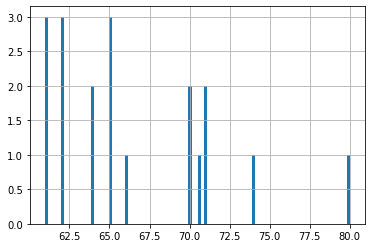

In [300]:
age.hist(bins=100)

### Exercise

* What is the maximum Fare that was paid? And the median?

In [333]:
# %load solutions/06_solutions.py
df.head()
fare = df['Fare']
print(fare)
print("Max : %f" %  fare.max())
print("Type : %s" % type(fare))

Name
Wheadon, Mr. Edward H                   10.5000
Ostby, Mr. Engelhart Cornelius          61.9792
Goldschmidt, Mr. George B               34.6542
Connors, Mr. Patrick                     7.7500
                                         ...   
Barkworth, Mr. Algernon Henry Wilson    30.0000
Mitchell, Mr. Henry Michael             10.5000
Crosby, Capt. Edward Gifford            71.0000
Svensson, Mr. Johan                      7.7750
Name: Fare, Length: 19, dtype: float64
Max : 263.000000
Type : <class 'pandas.core.series.Series'>


In [75]:
 %load solutions/07_solutions.py
fare.median()

14.4542

In [318]:
fare.quantile(0.5)

26.55

In [369]:
# df.head()
# df["Survived"] == 1
# df.loc[df["Survived"] == 1,"Survived"].count()
#df.loc[:,"Survived"].count()
#df.loc[df["Survived"] == 1,"Survived"].sum()
#survived.count() / df["Survived"].count()
print(type(df.iloc[:,0]))
#survived.describe()
#print(type(df))

<class 'pandas.core.series.Series'>


In [397]:
# I ld use this implementation instead of 08_solutions.py
mask = df["Survived"] == 1
survived = df.loc[mask, "Survived"]
# print(survived)
#
print(survived.count() )  # count: 342
print(df["Survived"].count()) # count: 891
print(survived.count() / df["Survived"].count())

342
891
0.3838383838383838


* Calculate the average survival ratio for passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).

In [374]:
# %load solutions/08_solutions.py
df['Survived'].sum() / df.shape[0]


0.3838383838383838

In [ ]:
# %load solutions/08_solutions.py
df['Survived'].sum() / df.shape[0]


In [373]:
# %load solutions/09_solutions.py
df['Survived'].mean()


0.3838383838383838

In [392]:
mask = (df["Age"] > 60) & (df["Sex"] == "male")
#df.loc[mask]
df.loc[mask,:]
#df.loc[mask,:].shape
#df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


* Select the sub-dataframe for which the men are older than 60 years old.

In [408]:
# %load solutions/10_solutions.py
((df['Age'] > 60) & (df['Sex'] == 'male')).value_counts()[True]   #  .value_counts() ->Return a Series containing counts of unique values.
print( ((df['Age'] > 60) & (df['Sex'] == 'male')).value_counts()[True] )  #19
print( ((df['Age'] > 60) & (df['Sex'] == 'male')).value_counts(dropna=False)[True] )  #19
print( ((df['Age'] > 60) & (df['Sex'] == 'male')).value_counts()[False] )  #872


19
19
PassengerId                         20
Survived                             1
Pclass                               3
Name           Masselmani, Mrs. Fatima
                        ...           
Ticket                            2649
Fare                             7.225
Cabin                              NaN
Embarked                             C
Name: 19, Length: 12, dtype: object
872


* Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers.

In [426]:
mask = df["Sex"] == "male"
df.loc[mask, "Age"].mean()
#df[Sex == 'male']

30.72664459161148

In [429]:
# %load solutions/12_solutions.py
df[df['Sex'] == 'female']['Age'].mean()


27.915708812260537

In [427]:
# %load solutions/11_solutions.py
mask_male = df.loc[:, 'Sex'] == 'male'
df.loc[mask_male, "Age"].mean()

# Age des female
# %load solutions/12_solutions.py
df[df['Sex'] == 'female']['Age'].mean()

30.72664459161148

In [430]:
df.loc[~mask_male, "Age"].mean()

27.915708812260537

* Plot the Fare distribution.

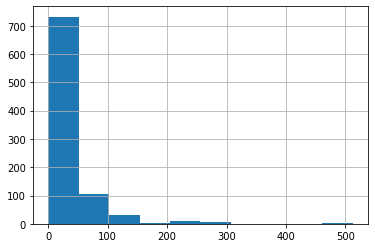

In [434]:
# %load solutions/13_solutions.py
df['Fare'].hist()



## 5. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [467]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})


### 5.1 Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [ ]:
df['data'].sum()

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [450]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### 5.2 Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="./splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [458]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [468]:
def func(x):
    return np.sum(x)

# -----------------------------------------------------------------
# aggregate(self, func, axis=0, *args, **kwargs) : Aggregate using one or more operations over the specified axis.
# func : function, str, list or dict
# Function to use for aggregating the data. If a function, must either work when passed a DataFrame or when passed to DataFrame.apply.

# Accepted combinations are:

# function
# string function name
# list of functions and/or function names, e.g. [np.sum, 'mean']
# dict of axis labels -> functions, function names or list of such.
# -----------------------------------------------------------------
df.groupby('key').aggregate([np.sum, np.median])  # 'sum'. J'aurais pu mettre une func
# df.groupby('key').aggregate([func, np.median])  # 'sum'. J'aurais pu mettre une func

data       
     sum median
key            
A     15      5
B     30     10
C     45     15

And many more methods are available. 

In [469]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

In [485]:
for group_name, group_df in df.groupby('key'):
    print(f'{type(group_name)} - {group_name}')
    print(type(group_df))

<class 'str'> - A
<class 'pandas.core.frame.DataFrame'>
<class 'str'> - B
<class 'pandas.core.frame.DataFrame'>
<class 'str'> - C
<class 'pandas.core.frame.DataFrame'>


### 5.3 Exercise: Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [486]:
df = pd.read_csv(os.path.join("data", "titanic.csv"))
df = df.set_index('Name')

In [487]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


* Using `groupby()`, calculate the average age for each sex.</li>


In [93]:
# %load solutions/14_solutions.py
df.groupby('Sex')['Age'].mean()



Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

* Using the `groupby()` function, plot the age distribution for each sex.

Sex
female    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
male      [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

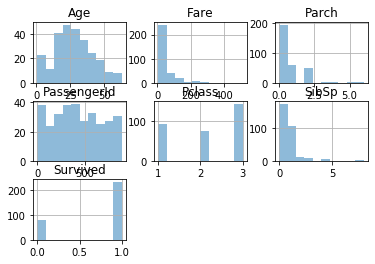

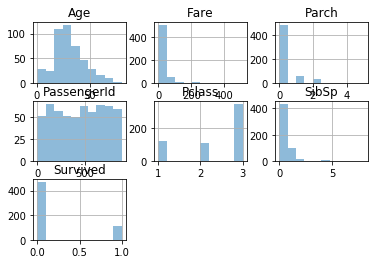

In [492]:
df.groupby('Sex').hist(alpha=0.5)

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

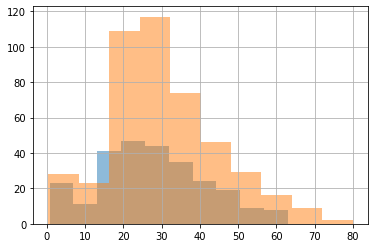

In [494]:
# %load solutions/15_solutions.py
df.groupby('Sex')['Age'].hist(alpha=0.5)

In [497]:
df.groupby('Sex')['Age']

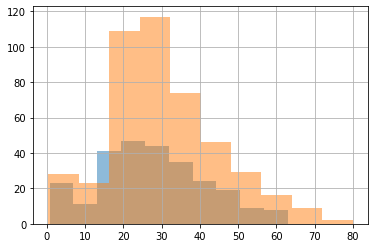

In [498]:
#fig, axs = plt.subplots()
for ax_id, (group_name, group_df) in enumerate(df.groupby('Sex')):  
    group_df['Age'].hist(alpha=0.5,label = group_name)
# plt.legend


0
1


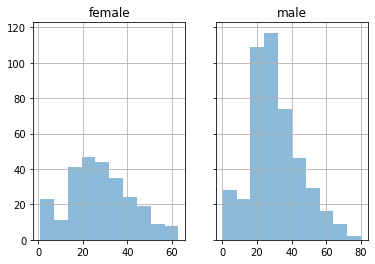

In [515]:
fig, axs = plt.subplots(ncols=2 
                        ,sharey=True
                       )
for ax_id, (group_name, group_df) in enumerate(df.groupby('Sex')):
    # ax_id : est un compteur qui s'autoinitialise par la boucle 'for' à partir de 0
    print(ax_id)
    group_df['Age'].hist(alpha=0.5, ax=axs[ax_id])
    axs[ax_id].set_title(group_name)

* Plot the fare distribution based on the class.

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

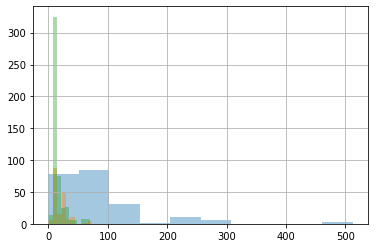

In [526]:
# %load solutions/16_solutions.py
df.groupby('Pclass')['Fare'].hist(alpha=0.4)

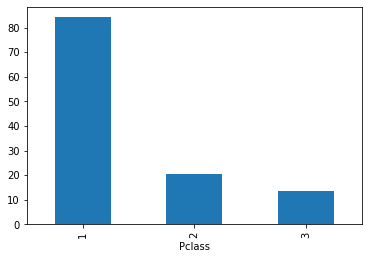

In [528]:
df.groupby('Pclass')['Fare'].mean().plot(kind='bar')

* Plot the survival rate by class with a bar plot.

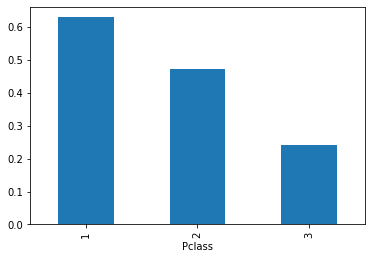

In [102]:
# %load solutions/17_solutions.py
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

* Compute the survival rate grouping by class and sex. (Hint: you can pass a list to the `groupby` function)

In [530]:
# %load solutions/18_solutions.py
df.groupby(['Pclass', 'Sex'])['Survived'].mean().to_frame()


Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

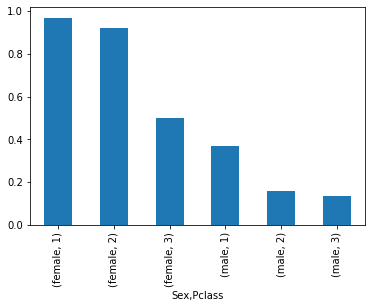

In [531]:
# %load solutions/18_solutions.py
df.groupby(['Sex', 'Pclass'])['Survived'].mean().plot(kind='bar')
#df.groupby([ 'Pclass', 'Sex'])['Survived'].mean().plot(kind='bar')

## 7. Merging different source of information

### 7.1 Simple concatenation

In [532]:
# series
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


Assume we have some similar data as in countries, but for a set of different countries:

In [533]:
data = {'country': ['Nigeria', 'Rwanda', 'Egypt', 'Morocco', ],
        'population': [182.2, 11.3, 94.3, 34.4],
        'area': [923768, 26338 , 1010408, 710850],
        'capital': ['Abuja', 'Kigali', 'Cairo', 'Rabat']}
countries_africa = pd.DataFrame(data)
countries_africa

,country,population,area,capital
0,Nigeria,182.2,923768,Abuja
1,Rwanda,11.3,26338,Kigali
2,Egypt,94.3,1010408,Cairo
3,Morocco,34.4,710850,Rabat


We now want to combine the rows of both datasets:

In [534]:
pd.concat([countries, countries_africa])

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
...,...,...,...,...
0,Nigeria,182.2,923768,Abuja
1,Rwanda,11.3,26338,Kigali
2,Egypt,94.3,1010408,Cairo
3,Morocco,34.4,710850,Rabat


If we don't want the index to be preserved:

In [535]:
pd.concat([countries, countries_africa], ignore_index=True)

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
...,...,...,...,...
5,Nigeria,182.2,923768,Abuja
6,Rwanda,11.3,26338,Kigali
7,Egypt,94.3,1010408,Cairo
8,Morocco,34.4,710850,Rabat


When the two dataframes don't have the same set of columns, by default missing values get introduced:

In [539]:
countries_africa[['country', 'capital']]  # df[ columns-names ] => Get the series composed of the list ['country', 'capital']

,country,capital
0,Nigeria,Abuja
1,Rwanda,Kigali
2,Egypt,Cairo
3,Morocco,Rabat


In [538]:
pd.concat([countries_africa[['country', 'capital']], countries], ignore_index=True, sort=False)

,country,capital,population,area
0,Nigeria,Abuja,NaN,NaN
1,Rwanda,Kigali,NaN,NaN
2,Egypt,Cairo,NaN,NaN
3,Morocco,Rabat,NaN,NaN
...,...,...,...,...
5,France,Paris,64.3,671308.0
6,Germany,Berlin,81.3,357050.0
7,Netherlands,Amsterdam,16.9,41526.0
8,United Kingdom,London,64.9,244820.0


## 7.2 Combining columns instead of rows

Assume we have another DataFrame for the same countries, but with some additional statistics:

In [540]:
data = {'country': ['Belgium', 'France', 'Netherlands'],
        'GDP': [496477, 2650823, 820726],
        'area': [8.0, 9.9, 5.7]}
country_economics = pd.DataFrame(data).set_index('country')
country_economics

,GDP,area
country,,
Belgium,496477,8.0
France,2650823,9.9
Netherlands,820726,5.7


In [541]:
pd.concat([countries, country_economics], axis=1)
# Comme l' index nest pas precisé Alors il a mergé sur l'index existant

,country,population,area,capital,GDP,area
0,Belgium,11.3,30510.0,Brussels,NaN,NaN
1,France,64.3,671308.0,Paris,NaN,NaN
2,Germany,81.3,357050.0,Berlin,NaN,NaN
3,Netherlands,16.9,41526.0,Amsterdam,NaN,NaN
4,United Kingdom,64.9,244820.0,London,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,496477.0,8.0
France,NaN,NaN,NaN,NaN,2650823.0,9.9
Netherlands,NaN,NaN,NaN,NaN,820726.0,5.7


`pd.concat` matches the different objects based on the index:

In [543]:
countries2 = countries.set_index('country')

In [544]:
countries2

,population,area,capital
country,,,
Belgium,11.3,30510,Brussels
France,64.3,671308,Paris
Germany,81.3,357050,Berlin
Netherlands,16.9,41526,Amsterdam
United Kingdom,64.9,244820,London


In [545]:
country_economics

,GDP,area
country,,
Belgium,496477,8.0
France,2650823,9.9
Netherlands,820726,5.7


In [546]:
pd.concat([countries2, country_economics], axis=1, sort=False)

,population,area,capital,GDP,area
Belgium,11.3,30510,Brussels,496477.0,8.0
France,64.3,671308,Paris,2650823.0,9.9
Germany,81.3,357050,Berlin,NaN,NaN
Netherlands,16.9,41526,Amsterdam,820726.0,5.7
United Kingdom,64.9,244820,London,NaN,NaN


### 7.3 Dataframe merging 

Using `pd.concat` above, we combined datasets that had the same columns or the same index values. But, another typical case if where you want to add information of second dataframe to a first one based on one of the columns. That can be done with `pd.merge`.

Let's look again at the titanic passenger data, but taking a small subset of it to make the example easier to grasp:

In [547]:
df = pd.read_csv("./data/titanic.csv")
df = df.loc[:9, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [548]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
...,...,...,...,...,...,...
6,0,1,male,54.0,51.8625,S
7,0,3,male,2.0,21.0750,S
8,1,3,female,27.0,11.1333,S
9,1,2,female,14.0,30.0708,C


Assume we have another dataframe with more information about the 'Embarked' locations:

In [550]:
locations = pd.DataFrame({'Embarked': ['S', 'C', 'Q', 'N'],
                          'City': ['Southampton', 'Cherbourg', 'Queenstown', 'New York City'],
                          'Country': ['United Kindom', 'France', 'Ireland', 'United States']})

In [551]:
locations

,Embarked,City,Country
0,S,Southampton,United Kindom
1,C,Cherbourg,France
2,Q,Queenstown,Ireland
3,N,New York City,United States


We now want to add those columns to the titanic dataframe, for which we can use `pd.merge`, specifying the column on which we want to merge the two datasets:

In [552]:
pd.merge(df, locations, on='Embarked', how='left')

,Survived,Pclass,Sex,Age,Fare,Embarked,City,Country
0,0,3,male,22.0,7.2500,S,Southampton,United Kindom
1,1,1,female,38.0,71.2833,C,Cherbourg,France
2,1,3,female,26.0,7.9250,S,Southampton,United Kindom
3,1,1,female,35.0,53.1000,S,Southampton,United Kindom
...,...,...,...,...,...,...,...,...
6,0,1,male,54.0,51.8625,S,Southampton,United Kindom
7,0,3,male,2.0,21.0750,S,Southampton,United Kindom
8,1,3,female,27.0,11.1333,S,Southampton,United Kindom
9,1,2,female,14.0,30.0708,C,Cherbourg,France


In this case we use `how='left'` (a "left join") because we wanted to keep the original rows of df and only add matching values from locations to it. Other options are 'inner', 'outer' and 'right' (see the docs for more on this).

## 8. Working with time series data

### 8.1 Time series preamble

In [553]:
no2 = pd.read_csv('data/20000101_20161231-NO2.csv', sep=';',
                  skiprows=[1], na_values=['n/d'],
                  index_col=0, parse_dates=True)

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [554]:
no2.index

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=149039, freq=None)

Indexing a time series works with strings:

In [570]:
len(no2["2010-01-01 09:00": "2010-01-01 12:00"])['BASCH']

TypeError: 'int' object is not subscriptable

In [571]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]['BASCH']

timestamp
2010-01-01 09:00:00    31.0
2010-01-01 10:00:00    41.0
2010-01-01 11:00:00    48.0
2010-01-01 12:00:00    63.0
Name: BASCH, dtype: float64

A nice feature is "partial string" indexing, so you don't need to provide the full datetime string.

E.g. all data of January up to March 2012:

In [572]:
no2['2012-01':'2012-03']

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,46.0,34.0,22.0,8.0
...,...,...,...,...
2012-03-31 20:00:00,61.0,55.0,29.0,17.0
2012-03-31 21:00:00,46.0,49.0,32.0,14.0
2012-03-31 22:00:00,56.0,41.0,27.0,14.0
2012-03-31 23:00:00,59.0,51.0,29.0,13.0


Time and date components can be accessed from the index:

In [573]:
no2.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=149039)

In [574]:
no2.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', name='timestamp', length=149039)

### 8.2 The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

Remember the air quality data:

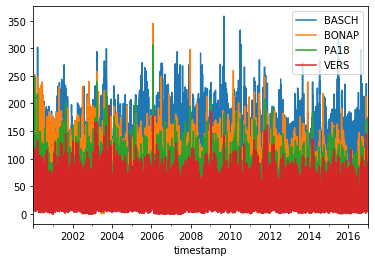

In [575]:
no2.plot()

The time series has a frequency of 1 hour. I want to change this to daily:

In [576]:
no2.head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01 01:00:00,108.0,NaN,65.0,47.0
2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2000-01-01 03:00:00,97.0,58.0,73.0,34.0
2000-01-01 04:00:00,77.0,52.0,57.0,29.0
2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [577]:
no2.resample('D').mean().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-01-01,83.173913,53.772727,64.695652,36.521739
2000-01-02,78.708333,59.250000,63.708333,17.166667
2000-01-03,82.333333,73.541667,61.000000,23.083333
2000-01-04,78.500000,73.708333,48.863636,23.791667
2000-01-05,94.291667,90.458333,60.166667,28.214286


Above I take the mean, but as with `groupby` I can also specify other methods:

In [583]:
no2.resample('Y').max().head()

,BASCH,BONAP,PA18,VERS
timestamp,,,,
2000-12-31,302.0,252.0,249.0,134.0
2001-12-31,270.0,230.0,201.0,146.0
2002-12-31,237.0,240.0,166.0,132.0
2003-12-31,299.0,258.0,240.0,197.0
2004-12-31,232.0,197.0,177.0,142.0


The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

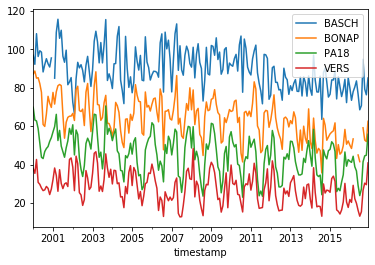

In [578]:
no2.resample('M').mean().plot() # 'A'

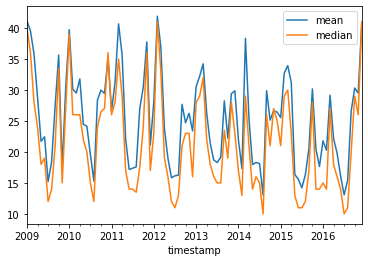

In [108]:
no2.loc['2009':, 'VERS'].resample('M').agg(['mean', 'median']).plot()
# ca ressemble commme un group by mais pour le temps

### 8.3 Exercise

The evolution of the yearly averages with, and the overall mean of all stations

* Use `resample` and `plot` to plot the yearly averages for the different stations.
* The overall mean of all stations can be calculated by taking the mean of the different columns (`.mean(axis=1)`).



## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/

* Books

    * "Python for Data Analysis" by Wes McKinney
    * "Python Data Science Handbook" by Jake VanderPlas

* Tutorials (many good online tutorials!)

  * https://github.com/jorisvandenbossche/pandas-tutorial
  * https://github.com/brandon-rhodes/pycon-pandas-tutorial

* Tom Augspurger's blog

  * https://tomaugspurger.github.io/modern-1.html